In [1]:
%load_ext autoreload
%autoreload 2
from metric_learn import Covariance
from visiprog.data import *
from visiprog.metric_learn import *
from visiprog.evaluate import *
%matplotlib inline
import numpy as np
from visiprog.metric_learn.fda_visiprog import LFDA_VISIPROG

from IPython.display import Image, display

np.set_printoptions(precision=2)

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
raw_feature = read_raw_feature()
print(raw_feature.shape)
material_label = read_material_label()

(5245, 82)


# Baseline approach
STSIM-M approach, no training

In [3]:
# cov = Covariance()
# cov.fit(raw_feature)
# X_STSIMM = cov.transform(raw_feature)

In [4]:
# np.savetxt('STSIM_M.csv', M, fmt='%.2f', delimiter=',')
# res = leave_one_sample_out(X_STSIMM)
# print(res['accuracy'])

# Fisher linear discriminant approach

Exact solution, however trained with semantic labels ...

In [5]:
model = LFDA()
model.fit(raw_feature, material_label)
X_fisher = model.transform(raw_feature)

In [6]:
# np.savetxt('FDA_semantic.csv', M, fmt='%.2f', delimiter=',')
res_fda = leave_one_sample_out(X_fisher, material_label)
print(res_fda['accuracy'])

0.989513822688


In [7]:
n_list = range(10,350,10)

In [8]:
representative = []

for n in n_list:
    print(n)
    km = KMeans(n_clusters = n, init='k-means++')
    km.fit(X_fisher)

    closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X_fisher)

    representative_label = [material_label[closest[i]] for i in km.labels_]
    representative_label = np.array(representative_label)

    representative.append(np.mean(representative_label == material_label))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340


# Train using ViSiProg label

In [9]:
groups, material = read_VSP_group(pappas_only=False)

In [10]:
visiprog_label = get_VSP_label(groups, raw_feature.shape[0])

In [11]:
model = LFDA_VISIPROG()
model.fit(raw_feature, visiprog_label)
X_vsp = model.transform(raw_feature)

In [12]:
res_vsp = leave_one_sample_out(X_vsp, material_label)
print(res_vsp['accuracy'])

0.99180171592


In [13]:
representative_VSP = []

for n in n_list:
    km = KMeans(n_clusters = n, init='k-means++')
    km.fit(X_fisher)

    closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X_fisher)

    representative_label = [material_label[closest[i]] for i in km.labels_]
    representative_label = np.array(representative_label)

    representative_VSP.append(np.mean(representative_label == material_label))

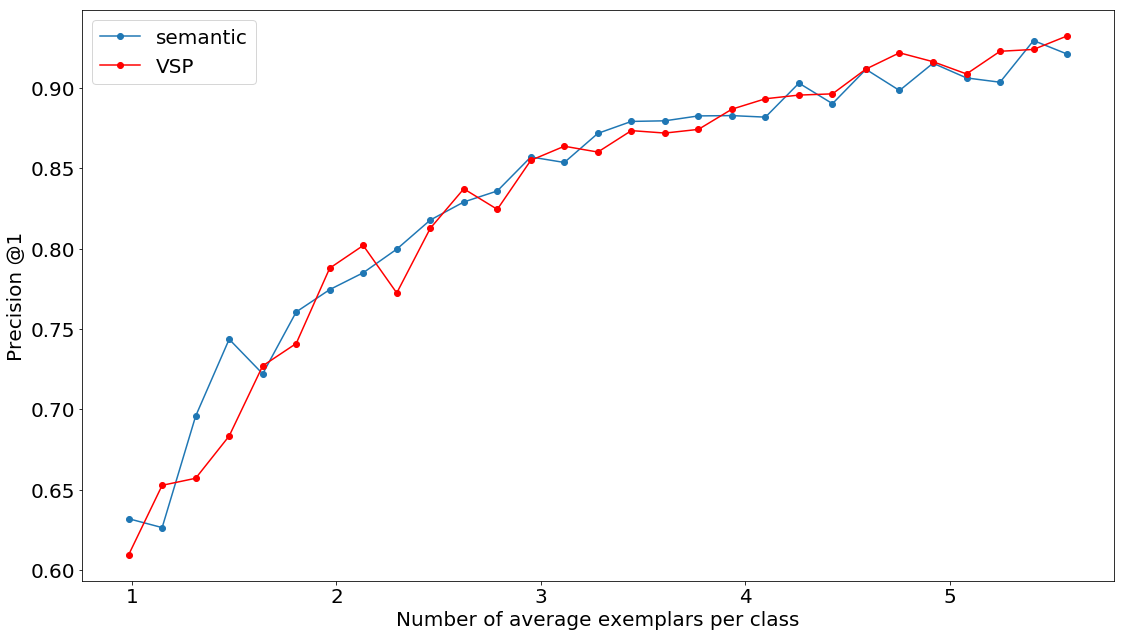

In [16]:
fig = plt.gcf()

matplotlib.rcParams.update({'font.size': 20})


fig.set_size_inches(18.5, 10.5)
plt.plot(np.array(n_list[5:])/61,representative[5:],'-o', label='semantic')
plt.plot(np.array(n_list[5:])/61,representative_VSP[5:], '-ro', label='VSP')

plt.ylabel('Precision @1')
plt.xlabel('Number of average exemplars per class')

plt.legend()

fig.savefig('thrasos/exemplars.pdf')
fig.savefig('thrasos/exemplars.eps', dpi=1200)